In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

json = pd.read_json ('https://pomber.github.io/covid19/timeseries.json')

In [2]:
def plot_country(country):
    df = pd.json_normalize(json[country])
    diff = df[['confirmed']].diff()[1:]
    df = df[1:]
    discharged = df.recovered+df.deaths
    hospitalized = df.confirmed - discharged
    
    print(df.tail(1).to_string(index=False))
    print('new',diff.tail(1).to_string(index=False))

    plt.figure(figsize=(8,4))
    plt.plot(df.confirmed,label='confirmed')
    plt.plot(df.recovered,c='g',label='recovered')
    plt.plot(df.deaths,c='r',label='deaths')
    plt.plot(discharged,dashes=[2,2,6, 2],c='y',label='discharged')
    plt.plot(hospitalized,dashes=[2,2,6, 2],c='b',label='hospitalized')
    plt.title(country)
    plt.xlabel('day')
    plt.legend(loc='upper left')
    plt.show()
    
    plt.figure(figsize=(8,4))
    plt.scatter(df.confirmed,diff.confirmed)
    model = np.poly1d(np.polyfit(df.confirmed, diff.confirmed, 2))
    xp = np.linspace(df.confirmed.min(), df.confirmed.max(), 100)
    plt.plot(xp, model(xp), c='r')
    plt.title(country)
    plt.xlabel('confirmed')
    plt.ylabel('new confirmed per day')
    plt.show()
    
    print('discharged: ',discharged.iloc[-1])
    print('deaths: ',df.deaths.iloc[-1])
    print('%: ',(df.deaths.iloc[-1]/discharged.iloc[-1]*100))

    plt.figure(figsize=(8,4))
    plt.scatter(df.recovered+df.deaths,df.deaths)
    plt.title(country)
    plt.xlabel('discharged')
    plt.ylabel('deaths')
    plt.show()


In [3]:
# for c in json.columns:
#     print(c)

      date  confirmed  deaths  recovered
 2020-4-17       2700      47       1689
new  confirmed
      28.0


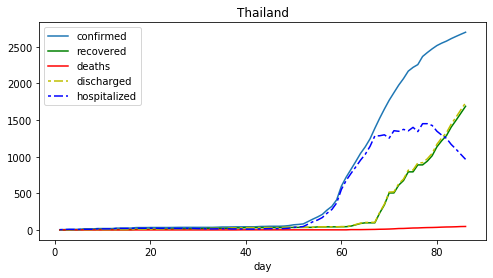

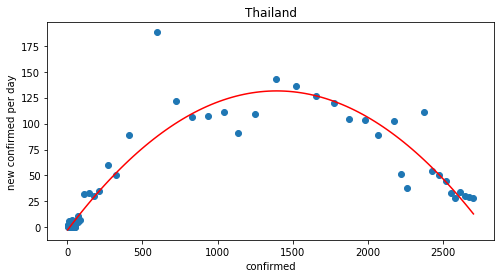

discharged:  1736
deaths:  47
%:  2.707373271889401


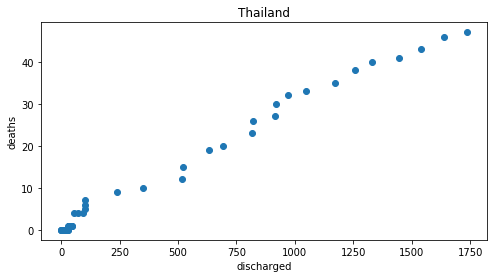

      date  confirmed  deaths  recovered
 2020-4-17       5251      86       2967
new  confirmed
      69.0


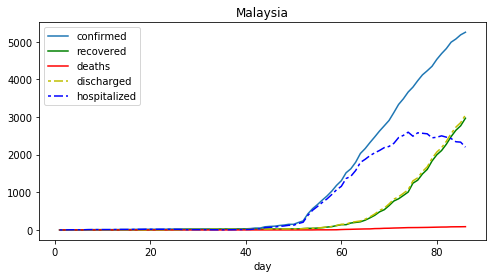

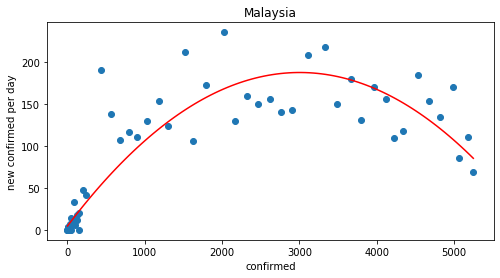

discharged:  3053
deaths:  86
%:  2.8169014084507045


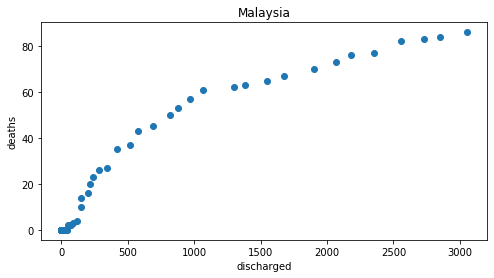

      date  confirmed  deaths  recovered
 2020-4-17       5050      11        708
new  confirmed
     623.0


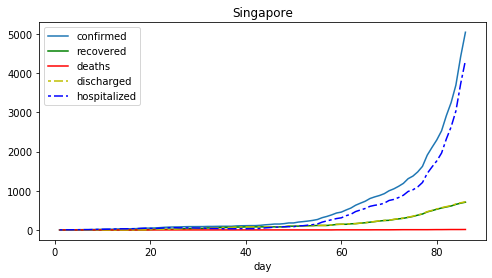

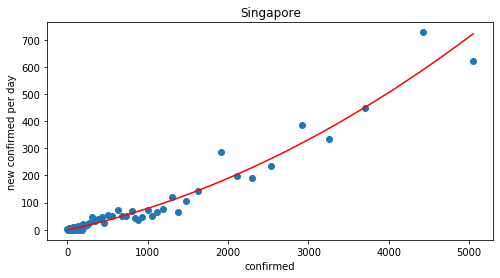

discharged:  719
deaths:  11
%:  1.52990264255911


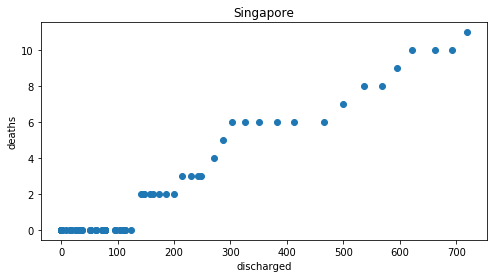

      date  confirmed  deaths  recovered
 2020-4-17       5923     520        607
new  confirmed
     407.0


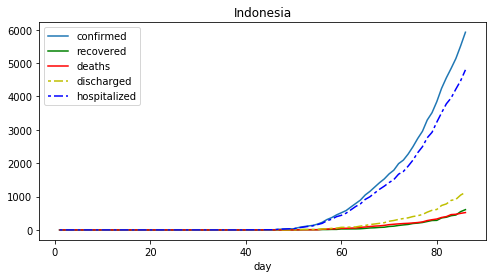

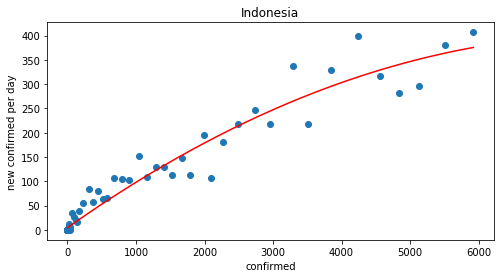

discharged:  1127
deaths:  520
%:  46.14019520851819


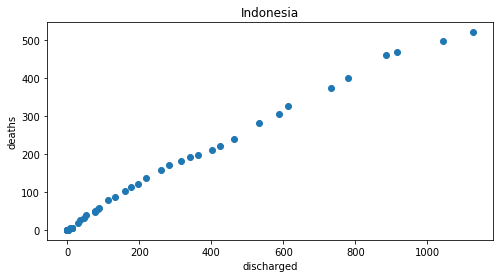

      date  confirmed  deaths  recovered
 2020-4-17     699706   36773      58545
new  confirmed
   31905.0


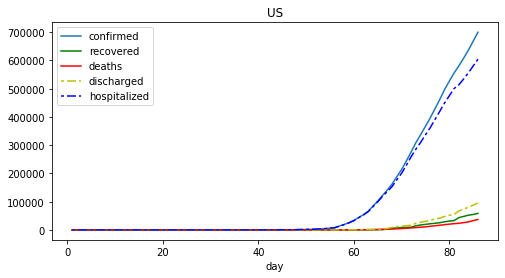

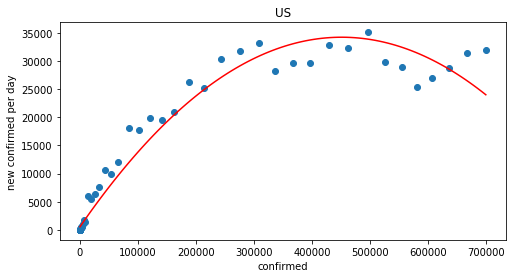

discharged:  95318
deaths:  36773
%:  38.57928198241675


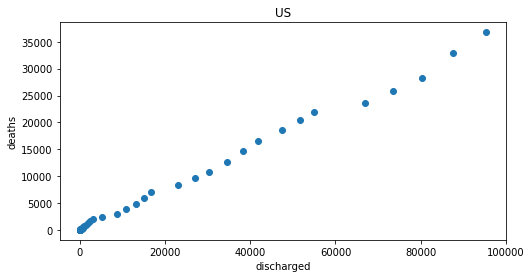

      date  confirmed  deaths  recovered
 2020-4-17      83760    4636      77552
new  confirmed
     357.0


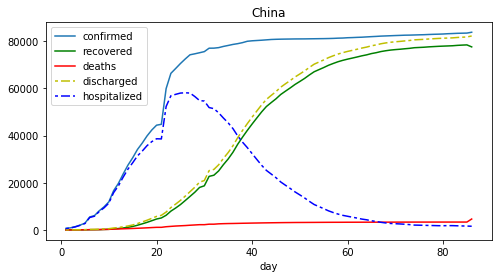

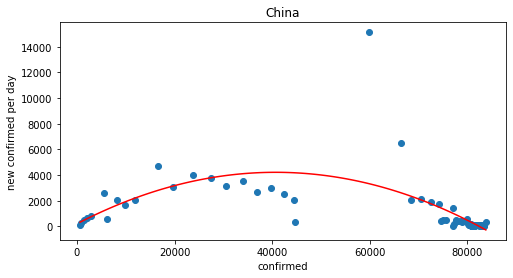

discharged:  82188
deaths:  4636
%:  5.64072614006911


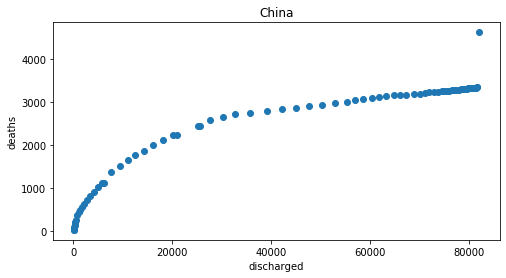

      date  confirmed  deaths  recovered
 2020-4-17      10635     230       7829
new  confirmed
      22.0


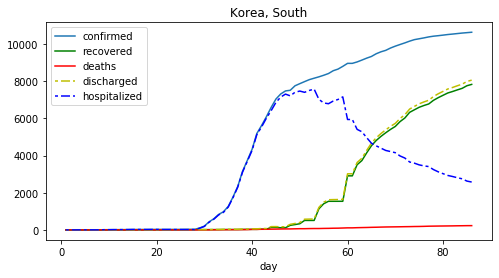

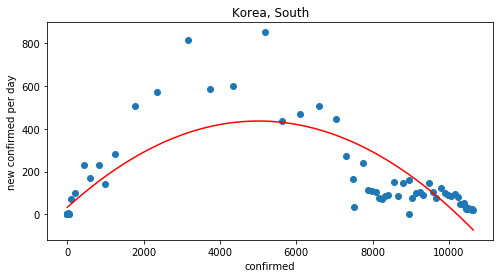

discharged:  8059
deaths:  230
%:  2.853952103238615


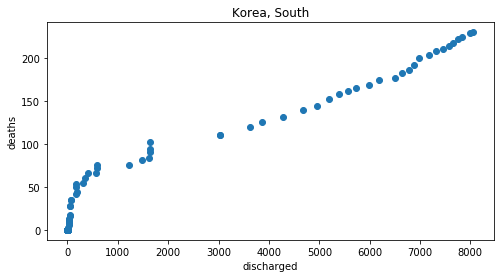

      date  confirmed  deaths  recovered
 2020-4-17     172434   22745      42727
new  confirmed
    3493.0


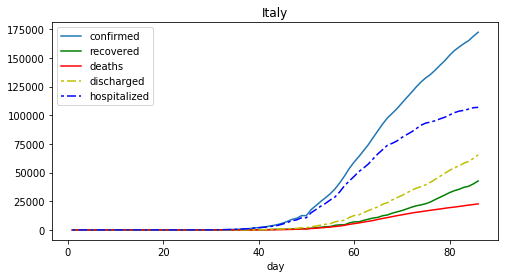

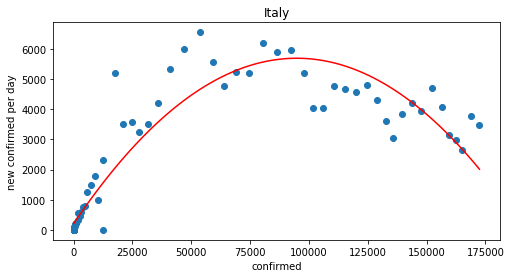

discharged:  65472
deaths:  22745
%:  34.74004154447703


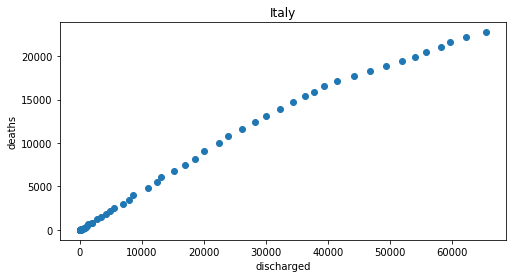

      date  confirmed  deaths  recovered
 2020-4-17     190839   20002      74797
new  confirmed
    5891.0


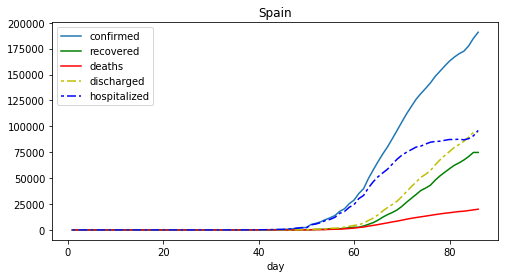

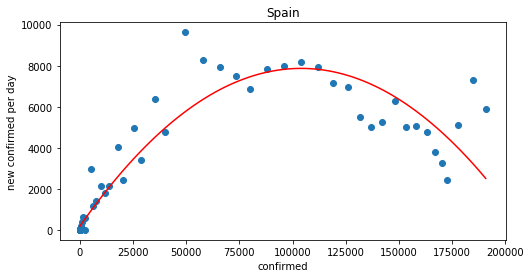

discharged:  94799
deaths:  20002
%:  21.099378685429173


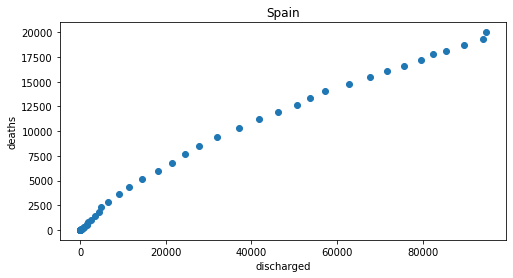

In [4]:
for c in ['Thailand','Malaysia','Singapore','Indonesia','US','China','Korea, South','Italy','Spain']:
    plot_country(c)
